# Banking Telmarketing Reponse Model

## 
1. Data Preprocessing 
2. Training Model
3. Eveulation Model
4. Final tune the Model 

In [88]:
from sklearn.tree import export_graphviz

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load data

In [2]:
data=pd.read_csv('bank-additional-full.csv', sep=';')
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.shape

(41188, 21)

In [4]:
data.describe() # basic descriptive statistics

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
#Create a new functionte to check the missing value : 
def num_missing(x):
    return sum(x.isnull())
##Applying per column:
print ("Missing values per column:")
print (data.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [7]:
# check the target variable, it shows dataset is imbalanced  88.7% of samples are labeled as "no" and 11.3% are labeled as "yes"
data['y'].value_counts()/len(data)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [9]:
data['y'] = data['y'].map({'no':0, 'yes':1}) # binary encoding of class label

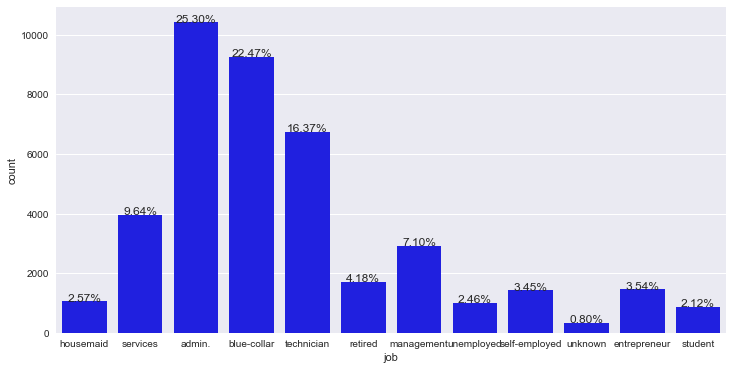

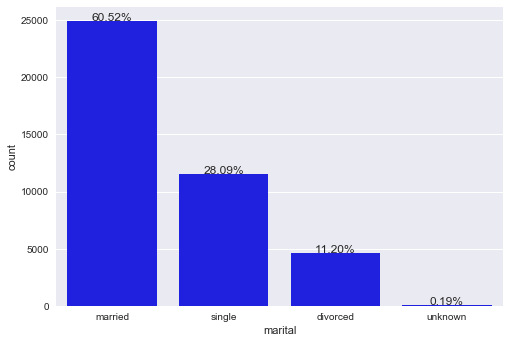

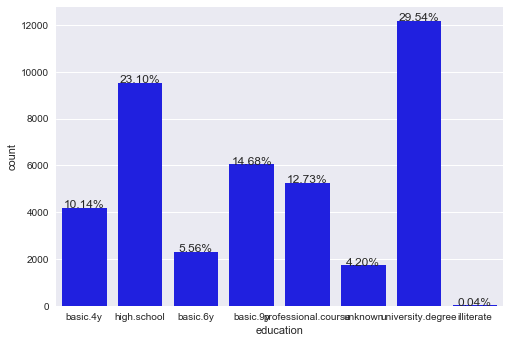

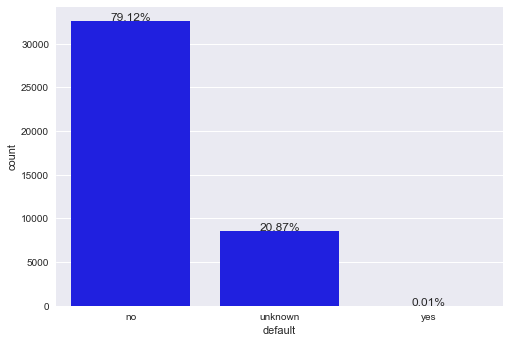

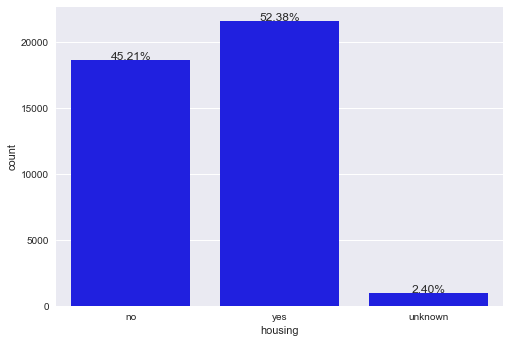

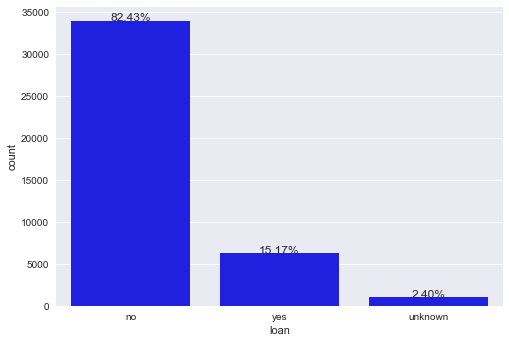

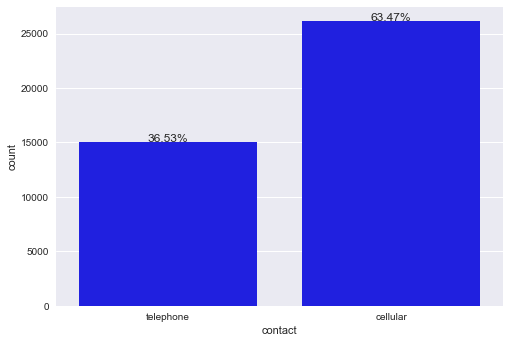

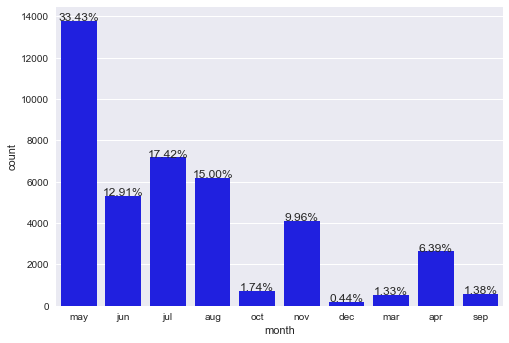

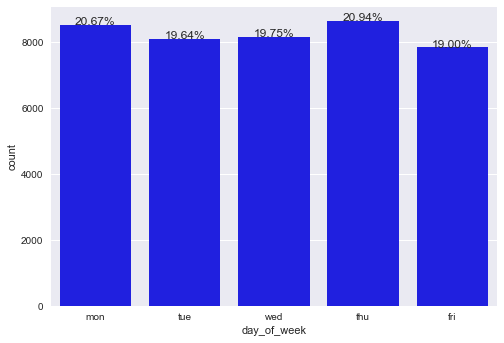

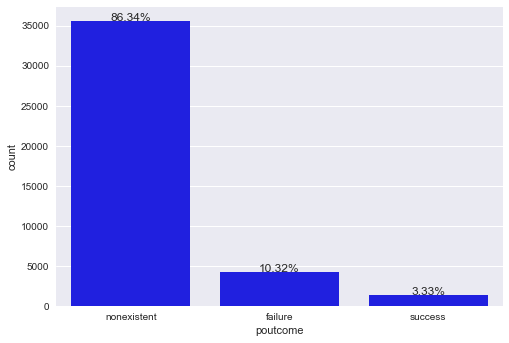

In [10]:
plt.figure(figsize=(12,6))   
categorical_var = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']    
total = float(len(data))     
for i in categorical_var:
    ax = sns.countplot(data[i],color="blue") 
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,
            '{:1.2%}'.format(height/total),
            ha="center")  
    plt.show()     

In [11]:
data.corr() # correlation matrix analysis to show r2 value

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


##  Data Preporcessing

In [12]:
# perform feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
             'euribor3m', 'nr.employed']

data[numerical] = scaler.fit_transform(data[numerical])

In [13]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0


In [14]:
data_new = pd.get_dummies(data)
data_new = data_new.drop('duration', axis=1)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null float64
campaign                         41188 non-null float64
pdays                            41188 non-null float64
previous                         41188 non-null float64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
y                                41188 non-null int64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-

In [15]:
random_stat=42
# split train and test set
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10, test_size = 0.3, random_state=random_stat)
for train_index, test_index in split.split(data_new, data_new['y']):
    train_set = data_new.loc[train_index]
    test_set = data_new.loc[test_index]

In [16]:
train_set['y'].value_counts()

0    25583
1     3248
Name: y, dtype: int64

In [17]:
train_set['y'].value_counts()/len(train_set)

0    0.887343
1    0.112657
Name: y, dtype: float64

In [18]:
test_set['y'].value_counts()/len(test_set) # make sure both class are distributed equally in train and test set.

0    0.887351
1    0.112649
Name: y, dtype: float64

In [19]:
# perform upsampling to address sample imbalance
from sklearn.utils import resample
# Separate majority and minority classes
train_negative = train_set[train_set['y']==0]
train_positive = train_set[train_set['y']==1]
 
# Upsample minority class
train_positive_upsample = resample(train_positive, 
                                 replace=True,     # sample with replacement
                                 n_samples=25583,    # to match majority class
                                 random_state=18) # reproducible results
 
# Combine majority class with upsampled minority class
train_upsample = pd.concat([train_negative, train_positive_upsample])
 
# Display new class counts
train_upsample['y'].value_counts()

1    25583
0    25583
Name: y, dtype: int64

In [20]:
# create X, y for upsampled training and testing
X_train = train_upsample.drop('y', axis=1)
X_test = test_set.drop('y', axis=1)
y_train = train_upsample['y']
y_test = test_set['y']
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

51166
12357
51166
12357


In [21]:
# create X, y for imbalanced train set used for performance validation
X_imb = train_set.drop('y', axis=1)
y_imb = train_set['y']

In [22]:
print(len(X_imb))
print(len(y_imb))

28831
28831


In [23]:
# Import metrics scores, GridSearchCV, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve

## Define function for model training

In [24]:
# create function to fit classifier using GridsearchCV and report metrics score on train dataset
def fit_classifier(model, X, y, parameters=None, scorer_metrics=None):

    # Perform grid search on the classifier using scorer_metrics as the scoring method
    grid_obj = GridSearchCV(estimator = model, param_grid = parameters, scoring=make_scorer(scorer_metrics), cv=10)

    # Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X, y)

    # Get the estimator
    model_estimator = grid_fit.best_estimator_

    # Report the metrics scores on train data
    model_estimator.fit(X, y)
    y_pred = model_estimator.predict(X)
    
    print("Accuracy score on the training data: {:.2f}".format(accuracy_score(y, y_pred)))
    print("Precision score on training data: {:.2f}".format(precision_score(y, y_pred)))
    print("Recall score on training data: {:.2f}".format(recall_score(y, y_pred)))
    print("ROC AUC score on training data: {:.2f}".format(roc_auc_score(y, y_pred)))
    print("\n")
    print("The best parameters are: {}".format(model_estimator))

    return model_estimator

In [26]:
# create function to use fitted model to report metrics score on test dataset
# return predicted classification on test dataset
def classifier_test(model_fit, X, y):
    y_pred = model_fit.predict(X)
    
    print("Accuracy score on the testing data: {:.2f}".format(accuracy_score(y, y_pred)))
    print("Precision score on testing data: {:.2f}".format(precision_score(y, y_pred)))
    print("Recall score on testing data: {:.2f}".format(recall_score(y, y_pred)))
    print("ROC AUC score on testing data: {:.2f}".format(roc_auc_score(y, y_pred)))
    return y_pred

In [27]:
# create function to plot ROC curve
def roc_curve_plot(model, X, y,label=None):
    # make sure positive class prediction is in the second column of binary prediction
    if label=='Neural Network':
        y_score = model.predict_proba(X)[:,0]
    else:
        y_score = model.predict_proba(X)[:,1]
    
    # generate ROC curve data
    roc = roc_curve(y, y_score)
    
    plt.plot(roc[0], roc[1], label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    roc_score = auc(roc[0],roc[1])
    print('AUC score of %s is %.2f.' % (label, roc_score))

In [52]:
# create function to generate the data inputs for Lift plot. Return the lists for accumulative lift,
# population accumulative, and descending predicted probability list
def lift_input(model, X, y, model_name=None):
    # extract the positive probability prediction
    if model_name == 'Neural Network':
        proba_pos = model.predict_proba(X)[:,0]
    else:
        proba_pos = model.predict_proba(X)[:,1]
    # create np.array of positive class label
    actual_pos = np.array(list(y))
    
    # reshape the numpy arrays to (dim, 1) and join the predicted and actual class label to generate 2D array
    joint = np.concatenate([proba_pos.reshape(proba_pos.shape[0],1), actual_pos.reshape(actual_pos.shape[0],1)], 
                           axis=1)
    
    # sort 2D array in ascending order by the column of predicted class probability
    joint_sort=np.sort(joint.view('i8,i8'), order=['f0'], axis=0).view(np.float)
    
    # calculate the number of total sample and positive class
    total_num = len(joint_sort)
    total_positive = sum(joint_sort[:,1]==1)

    # create reverse order of actual class label and result in the order from high to low probability
    positive_reverse = joint_sort[:,1][::-1]
    
    # reverse order of predicted probability in the order from high to low
    # will be used for identifying customarized probability threshold in y_predict_threshold function
    pred_proba_descending = joint_sort[:,0][::-1] 

    # create cumulative response%
    positive_cumulative = 0
    positive_cumulative_list = [0]
    for i in range(len(joint_sort)):
        positive_cumulative = positive_cumulative + positive_reverse[i]/total_positive
        positive_cumulative_list.append(positive_cumulative)
        
    # create cumulative population %
    population_cumulative = 0
    population_cumulative_list = [0]
    for i in range(len(joint_sort)):
        population_cumulative = population_cumulative + i/total_num
        population_cumulative_list.append(i/total_num)
        
    return positive_cumulative_list, population_cumulative_list, pred_proba_descending


In [46]:
# create function to calculate and plot lift gain. Return the list of lift gain.
def lift_chart(lift_input, label=None):
    lift_gain_list = []
    # set counter for probability close to 0 (can not be divided) 
    n = 0
    for i in range(0,len(lift_input[0])):
        # exclude 0 probability indices to avoid zero division problem
        if lift_input[1][i]==0:
            n+=1
            continue
        else:
            # calculate lift gain (%response or positive/%population)
            lift_gain_list.append(lift_input[0][i]/lift_input[1][i]) 

    plt.plot(lift_input[1][0:(len(lift_input[1])-n)], lift_gain_list, label=label)
    plt.plot([0,1],[1,1], 'k--') # reference line with no lift gain at all (=1)
    plt.axis([0,1,0,10])
    plt.xlabel('Population%')
    plt.ylabel('Lift Gain')
    return lift_gain_list

In [53]:
# create function to plot Lift chart
from sklearn.metrics import auc

def gain_plot(lift_input, label=None):
    plt.plot(lift_input[1], lift_input[0], label=label)
    plt.plot([0,1],[0,1], 'k--') # reference line for random model
    plt.axis([0,1,0,1])
    plt.xlabel('Population%')
    plt.ylabel('Subscribe%')
    # calculate area under curve
    AUC = auc(lift_input[1], lift_input[0], reorder=False)
    print('AUC score of %s is %.4f.' % (label, AUC))

In [54]:
# create a function to predict clients likely to subscribe based on the probability threshold defined by
# the desired population% of the clients to be contacted
# top_percent is the desired population percentage for marketing contact, i.e., 0.2 = top 20%
def y_predict_cutoff(model, X, y, top_percent, model_name=None):
    lift_input_model = lift_input(model, X, y, model_name=model_name)
    # get the indice of probility threshold meeting top_percent number
    idx = int(len(lift_input_model[2])*top_percent)
    # get the probility threshold for classification cutoff
    threshold_proba = lift_input_model[2][idx]
    
    # list of predicted probability
    if model_name == 'Neural Network':
        y_proba = model.predict_proba(X)[:,0]
    else:
        y_proba = model.predict_proba(X)[:,1]
        
    # 0,1 classification using threshold cutff
    y_predict = (y_proba>=threshold_proba).astype(int)
    return y_predict

## Training Model

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

### Baseline model : Naive Bayes 

In [34]:
# Naive Bayes model without GridserachCV
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)
y_pred_GNB = model_GNB.predict(X_train)
print("Accuracy score on the training data: {:.2f}".format(accuracy_score(y_train, y_pred_GNB)))
print("Precision score on training data: {:.2f}".format(precision_score(y_train, y_pred_GNB)))
print("Recall score on training data: {:.2f}".format(recall_score(y_train, y_pred_GNB)))
print("ROC AUC score on training data: {:.2f}".format(roc_auc_score(y_train, y_pred_GNB)))
print("\n")
# Report the metrics scores on test data
y_pred_test_GNB = model_GNB.predict(X_test)
print("Accuracy score on the test data: {:.2f}".format(accuracy_score(y_test, y_pred_test_GNB)))
print("Precision score on test data: {:.2f}".format(precision_score(y_test, y_pred_test_GNB)))
print("Recall score on test data: {:.2f}".format(recall_score(y_test, y_pred_test_GNB)))
print("ROC AUC score on test data: {:.2f}".format(roc_auc_score(y_test, y_pred_test_GNB)))

Accuracy score on the training data: 0.70
Precision score on training data: 0.81
Recall score on training data: 0.51
ROC AUC score on training data: 0.70


Accuracy score on the test data: 0.84
Precision score on test data: 0.35
Recall score on test data: 0.51
ROC AUC score on test data: 0.70


In [37]:
# save the model to current directory
joblib.dump(model_GNB, 'GNB_model.pkl')

['GNB_model.pkl']

###  Logistic Regression Model

In [30]:
# Create the parameters list
parameters_LR = {'C': [10**i for i in range(-5,5)], 'penalty': ['l1', 'l2']}

model_LR = fit_classifier(LogisticRegression(random_state=random_stat), X_train, y_train, 
                          parameters=parameters_LR, scorer_metrics=recall_score)

Accuracy score on the training data: 0.72
Precision score on training data: 0.72
Recall score on training data: 0.71
ROC AUC score on training data: 0.72


The best parameters are: LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [71]:
# Logistic regression model performance on test dataset
y_test_LR = classifier_test(model_LR, X_test, y_test)

Accuracy score on the testing data: 0.73
Precision score on testing data: 0.25
Recall score on testing data: 0.70
ROC AUC score on testing data: 0.72


### Decision Tree model

In [63]:
# Decision Tree model
# Create the parameters list
parameters_DT = {'max_depth': [3,5],
                 'min_samples_leaf': [2,3,5],
                 'min_samples_split': [2,3,5]}

model_DT = fit_classifier(DecisionTreeClassifier(random_state=random_stat), X_train, y_train, 
                          parameters=parameters_DT, scorer_metrics=recall_score)

Accuracy score on the training data: 0.75
Precision score on training data: 0.79
Recall score on training data: 0.67
ROC AUC score on training data: 0.75


The best parameters are: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')


In [72]:
# Decision Tree model performance on test dataset
y_test_DT = classifier_test(model_DT, X_test, y_test)

Accuracy score on the testing data: 0.80
Precision score on testing data: 0.32
Recall score on testing data: 0.67
ROC AUC score on testing data: 0.75


In [89]:
export_graphviz(model_DT,
                out_file='tree.dot')

In [90]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("tree.pdf")

ModuleNotFoundError: No module named 'pydot'

In [64]:
# save the model to current directory
joblib.dump(model_DT, 'Decisiontree_model.pkl')

['Decisiontree_model.pkl']

### Random Forest Model

In [41]:
# Create the parameters list
parameters_RF = {'max_depth': [5,6,7], 'min_samples_leaf': [100,300,500], 'min_samples_split': [100,300,500]}

model_RF = fit_classifier(RandomForestClassifier(random_state=random_stat), X_train, y_train, 
                          parameters=parameters_RF, scorer_metrics=recall_score)

Accuracy score on the training data: 0.73
Precision score on training data: 0.77
Recall score on training data: 0.67
ROC AUC score on training data: 0.73


The best parameters are: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=500,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)


In [73]:
# random forest model performance on test dataset
y_test_RF = classifier_test(model_RF, X_test, y_test)

Accuracy score on the testing data: 0.79
Precision score on testing data: 0.30
Recall score on testing data: 0.67
ROC AUC score on testing data: 0.74


In [42]:
# save the model to current directory
joblib.dump(model_RF , 'Random_forest_model.pkl')

['Random_forest_model.pkl']

## Model performance evaluation 

In [43]:
from sklearn.metrics import auc

In [65]:
# load saved models
model_GNB = joblib.load('GNB_model.pkl')
model_DT = joblib.load('Decisiontree_model.pkl')
model_LR = joblib.load('Logistic_Regression_model.pkl')
model_RF = joblib.load('Random_Forest_model.pkl')

AUC score of Gaussian Naive Bayes is 0.77.
AUC score of Logistic Regression is 0.78.
AUC score of Decision Tree is 0.80.
AUC score of Random Forest is 0.80.


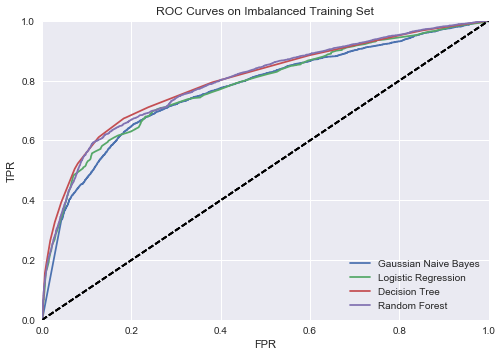

In [67]:
# plot ROC curve for each model on imbalanced training set
roc_curve_plot(model_GNB, X_imb, y_imb, label='Gaussian Naive Bayes')
roc_curve_plot(model_LR, X_imb, y_imb, label='Logistic Regression')
roc_curve_plot(model_DT, X_imb, y_imb, label='Decision Tree')
roc_curve_plot(model_RF, X_imb, y_imb, label='Random Forest')
plt.title('ROC Curves on Imbalanced Training Set')
plt.legend(loc='lower right')
plt.show()

AUC score of Gaussian Naive Bayes is 0.77.
AUC score of Logistic Regression is 0.78.
AUC score of Decision Tree is 0.79.
AUC score of Random Forest is 0.79.


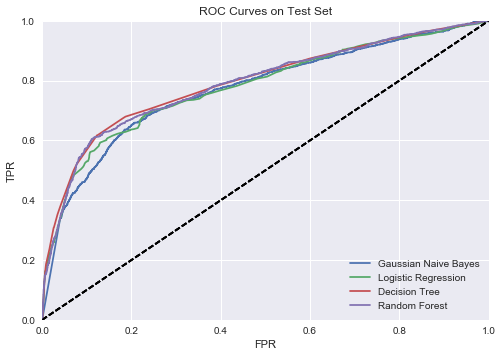

In [68]:
# plot ROC curve for each model on test dataset
roc_curve_plot(model_GNB, X_test, y_test, label='Gaussian Naive Bayes')
roc_curve_plot(model_LR, X_test, y_test, label='Logistic Regression')
roc_curve_plot(model_DT, X_test, y_test, label='Decision Tree')
roc_curve_plot(model_RF, X_test, y_test, label='Random Forest')
plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')

AUC score of Gaussian Naive Bayes is 0.7459.
AUC score of Logistic Regression is 0.7510.
AUC score of Decision Tree is 0.7961.
AUC score of Random Forest is 0.7633.


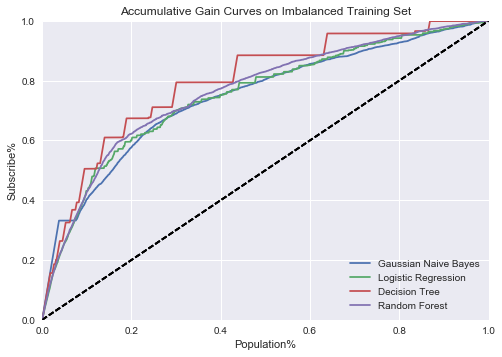

In [69]:
# Accumulative Lift Curves graph on imbalanced training set
lift_GNB_imb = lift_input(model_GNB, X_imb, y_imb)
gain_plot(lift_GNB_imb, label='Gaussian Naive Bayes')
lift_LR_imb = lift_input(model_LR, X_imb, y_imb)
gain_plot(lift_LR_imb, label='Logistic Regression')
lift_DT_imb = lift_input(model_DT, X_imb, y_imb)
gain_plot(lift_DT_imb, label='Decision Tree')
lift_RF_imb = lift_input(model_RF, X_imb, y_imb)
gain_plot(lift_RF_imb, label='Random Forest')
plt.title('Accumulative Gain Curves on Imbalanced Training Set')
plt.legend(loc='lower right')
plt.show()

AUC score of Gaussian Naive Bayes is 0.7463.
AUC score of Logistic Regression is 0.7502.
AUC score of Decision Tree is 0.7905.
AUC score of Random Forest is 0.7567.


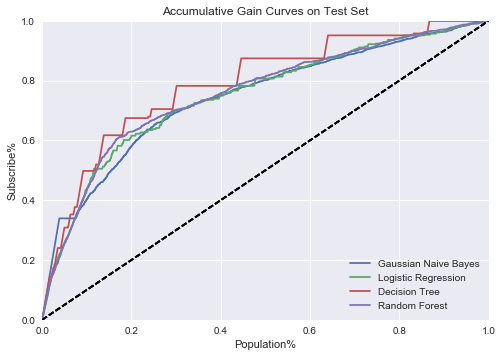

In [70]:
# Accumulative Lift Curves graph on test dataset
lift_GNB = lift_input(model_GNB, X_test, y_test)
gain_plot(lift_GNB, label='Gaussian Naive Bayes')
lift_LR = lift_input(model_LR, X_test, y_test)
gain_plot(lift_LR, label='Logistic Regression')
lift_DT = lift_input(model_DT, X_test, y_test)
gain_plot(lift_DT, label='Decision Tree')
lift_RF = lift_input(model_RF, X_test, y_test)
gain_plot(lift_RF, label='Random Forest')
plt.title('Accumulative Gain Curves on Test Set')
plt.legend(loc='lower right')
plt.show()

## Final Model Tuining

In [74]:
# further fine tune decision tree model
parameters_DT_impv = {'criterion':['gini','entropy'], 
                      'splitter':['best','random'],
                      'max_depth': [3, 5],
                      'min_samples_leaf': [2,3,5],
                      'min_samples_split': [2,3,5],
                      'max_features': [None,'auto','sqrt','log2'],
                      'class_weight': [None,'balanced'],
                      'presort': [True,False]
                     }

model_DT_impv = fit_classifier(DecisionTreeClassifier(random_state=random_stat), X_train, y_train, 
                          parameters=parameters_DT_impv, scorer_metrics=recall_score)

Accuracy score on the training data: 0.65
Precision score on training data: 0.63
Recall score on training data: 0.73
ROC AUC score on training data: 0.65


The best parameters are: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=True, random_state=42, splitter='random')


In [75]:
# Improved Decision Tree model performance on test dataset
y_test_DT_impv = classifier_test(model_DT_impv, X_test, y_test)

Accuracy score on the testing data: 0.59
Precision score on testing data: 0.18
Recall score on testing data: 0.75
ROC AUC score on testing data: 0.66


In [76]:
# save the model to current directory
joblib.dump(model_DT_impv, 'Decision_Tree_model_impv.pkl')

['Decision_Tree_model_impv.pkl']

In [79]:
# Version 2 further fine tune decision tree model
parameters_DT_impv2= {'criterion':['gini','entropy'], 
                      'splitter':['best','random'],
                      'max_depth': [3, 4, 5, 6,7],
                      'min_samples_leaf': [2,3,5],
                      'min_samples_split': [2,3,5],
                      'max_features': [None,'auto','sqrt','log2'],
                      'class_weight': [None,'balanced'],
                      'presort': [True,False]
                     }

model_DT_impv2 = fit_classifier(DecisionTreeClassifier(random_state=random_stat), X_train, y_train, 
                          parameters=parameters_DT_impv, scorer_metrics=recall_score)

Accuracy score on the training data: 0.65
Precision score on training data: 0.63
Recall score on training data: 0.73
ROC AUC score on training data: 0.65


The best parameters are: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=True, random_state=42, splitter='random')


In [80]:
# Improved Decision Tree model performance on test dataset
y_test_DT_impv = classifier_test(model_DT_impv2, X_test, y_test)

Accuracy score on the testing data: 0.59
Precision score on testing data: 0.18
Recall score on testing data: 0.75
ROC AUC score on testing data: 0.66


In [81]:
# save the model to current directory
joblib.dump(model_DT_impv2, 'Decision_Tree_model_impv2.pkl')

['Decision_Tree_model_impv2.pkl']

AUC score of Decision Tree is 0.80.
AUC score of Decision Tree - Improved(v1) is 0.71.
AUC score of Decision Tree - Improved(v2) is 0.71.
AUC score of Gaussian Naive Bayes is 0.77.


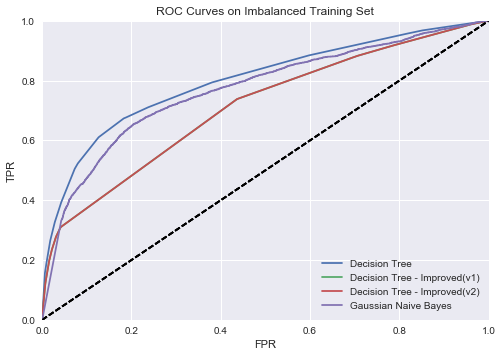

In [83]:
# plot ROC curve for improved model on imbalanced training set
roc_curve_plot(model_DT, X_imb, y_imb, label='Decision Tree')
roc_curve_plot(model_DT_impv, X_imb, y_imb, label='Decision Tree - Improved(v1)')
roc_curve_plot(model_DT_impv2, X_imb, y_imb, label='Decision Tree - Improved(v2)')
roc_curve_plot(model_GNB, X_imb, y_imb, label='Gaussian Naive Bayes')
plt.title('ROC Curves on Imbalanced Training Set')
plt.legend(loc='lower right')
plt.show()

AUC score of Decision Tree is 0.79.
AUC score of Decision Tree - Improved(v1) is 0.72.
AUC score of Decision Tree - Improved(v2) is 0.72.
AUC score of Gaussian Naive Bayes is 0.77.


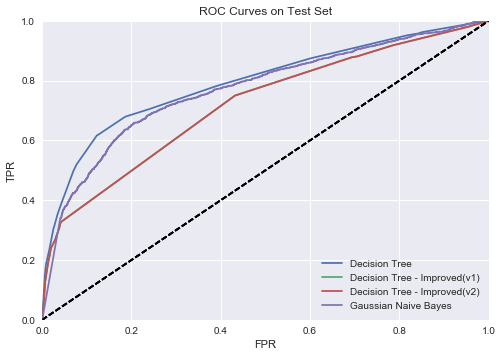

In [84]:
# plot ROC curve for improved model on test set
roc_curve_plot(model_DT, X_test, y_test, label='Decision Tree')
roc_curve_plot(model_DT_impv, X_test, y_test, label='Decision Tree - Improved(v1)')
roc_curve_plot(model_DT_impv2, X_test, y_test, label='Decision Tree - Improved(v2)')
roc_curve_plot(model_GNB, X_test, y_test, label='Gaussian Naive Bayes')
plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')
plt.show()

## Confusion Matrix Analysis 

In [86]:
from sklearn.metrics import confusion_matrix
import confusion_matrix_plot_module # This is a function downloaded from 
def draw_ConfusionMatrix(conf_matrix, classifier_name):
    ''' The confusion matrix draw function'''
    fig, ax = plt.subplots(figsize=(4.5, 4.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Greens, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

    plt.title('Confusion Matrix for %s' % classifier_name)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()

ModuleNotFoundError: No module named 'confusion_matrix_plot_module'

In [85]:
# marketing simulation with 20% client contact budget and confusion matrix analysis
from sklearn.metrics import confusion_matrix
import confusion_matrix_plot_module # This is a function downloaded from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# make predictions on test set with original DT model
y_pred_DT = draw_ConfusionMatri(model_DT_impv2, X_test, y_test, 0.2)

# create confusion matrix
confusion_matrix_DT = confusion_matrix(y_test, y_pred_DT)

# plot confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(confusion_matrix_DT, normalize=True, classes=['not subscribe','subscribe'],
                      title='Confusion matrix with normalization - Original')

ModuleNotFoundError: No module named 'confusion_matrix_plot_module'